# Regressão Linar Múltipla com os dados do Enade 2018
## Alunos dos cursos de Ciências Economia 
---
* Incorporar variáveis independentes que expliquem o fenômeno
* Função de produção educacional
> Variáveis: esforço, nível econômico, nível social da família, conhecimento

In [10]:
install.packages("ggpubr")

Warning message:
"package 'ggpubr' is in use and will not be installed"

In [2]:
library(dplyr)
library(ggplot2)
library(AER)
library(gvlma)
library(lmtest)
library(nortest)
library(ggpubr)
library(plyr)


In [3]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [4]:
df = data[data$CO_GRUPO == 13,]

In [5]:
str(df)

'data.frame':	9582 obs. of  137 variables:
 $ NU_ANO            : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ CO_IES            : int  1780 1780 1780 1780 1780 1780 1780 1780 1780 1780 ...
 $ CO_CATEGAD        : int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ CO_ORGACAD        : int  10022 10022 10022 10022 10022 10022 10022 10022 10022 10022 ...
 $ CO_GRUPO          : int  13 13 13 13 13 13 13 13 13 13 ...
 $ CO_CURSO          : int  81867 81867 81867 81867 81867 81867 81867 81867 81867 81867 ...
 $ CO_MODALIDADE     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_MUNIC_CURSO    : int  4309605 4309605 4309605 4309605 4309605 4309605 4309605 4309605 4309605 4309605 ...
 $ CO_UF_CURSO       : int  43 43 43 43 43 43 43 43 43 43 ...
 $ CO_REGIAO_CURSO   : int  4 4 4 4 4 4 4 4 4 4 ...
 $ NU_IDADE          : int  28 30 29 22 47 27 23 48 23 21 ...
 $ TP_SEXO           : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ ANO_FIM_EM        : int  2008 2006 20

# Notas
---

In [6]:
notas = df$NT_GER

In [7]:
summary(notas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    28.9    37.2    38.4    47.0    90.2    1509 

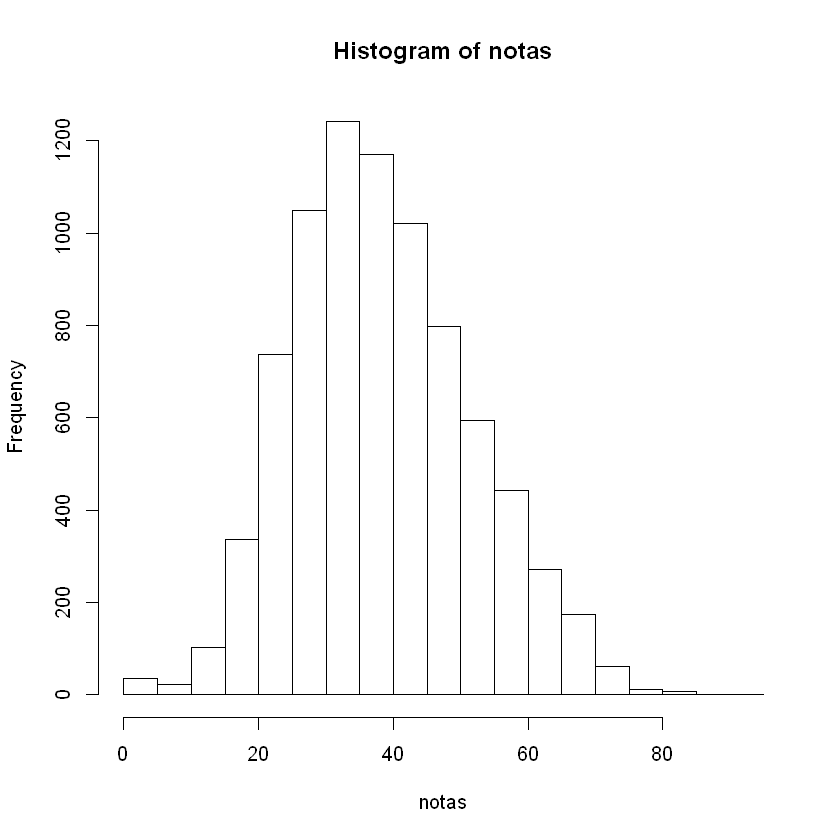

In [8]:
hist(notas)

In [9]:
modalidade = as.factor(df$CO_MODALIDADE) 

In [10]:
table(modalidade)

modalidade
   1    2 
9431  151 

In [11]:
modalidade = mapvalues(df$CO_MODALIDADE, from=c(1,2), to=c("presencial","distancia"))

In [12]:
prop.table(table(modalidade))

modalidade
 distancia presencial 
0.01575871 0.98424129 

# Comportamento das notas detas categorias
---
* Não existe muita diferênça na média entre o ensino presencial e à distância

In [13]:
tapply(notas, modalidade, FUN=mean,na.rm=TRUE)

distancia presencial 
  38.28300   38.39886

Warning message:
"Removed 1509 rows containing non-finite values (stat_summary)."

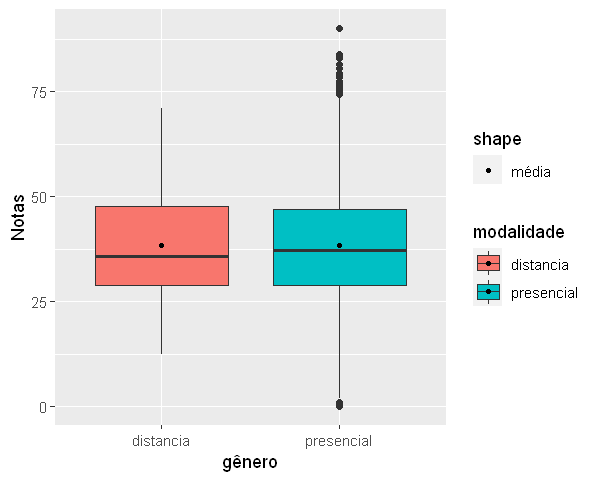

In [14]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x=modalidade, y=notas, fill=modalidade)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    xlab("gênero")+
    ylab("Notas");

# Esforço: horas dedicadas as estudo
---
* Muita variância, principalmente para quem diz que estuda mais que 12 horas;
* Quanto mais estuda mais aumenta a média do aluno
* Da indícios de que quanto maior o esforço maior o desempenho

In [15]:
esforco = as.factor(df$QE_I23)
esforco = mapvalues(df$QE_I23, from=c("A","B","C","D","E"), to=c("Nenhuma, apenas assistindo as aulas","De uma a três",
                                                                "De quatro a sete","De oito adoze","Mais de doze"))
prop.table(table(esforco))

esforco
                                    Nenhuma, apenas assistindo as aulas 
                         0.11344187                          0.08035901 
                      De uma a três                    De quatro a sete 
                         0.34554373                          0.27134210 
                      De oito adoze                        Mais de doze 
                         0.10321436                          0.08609894 

In [16]:
tapply(notas, esforco, FUN=mean, na.rm=T)

Nenhuma, apenas assistindo as aulas 
                           34.51633                            36.80503 
                      De uma a três                    De quatro a sete 
                           36.63784                            38.65646 
                      De oito adoze                        Mais de doze 
                           41.17359                            42.91801

Warning message:
"Removed 1509 rows containing non-finite values (stat_summary)."

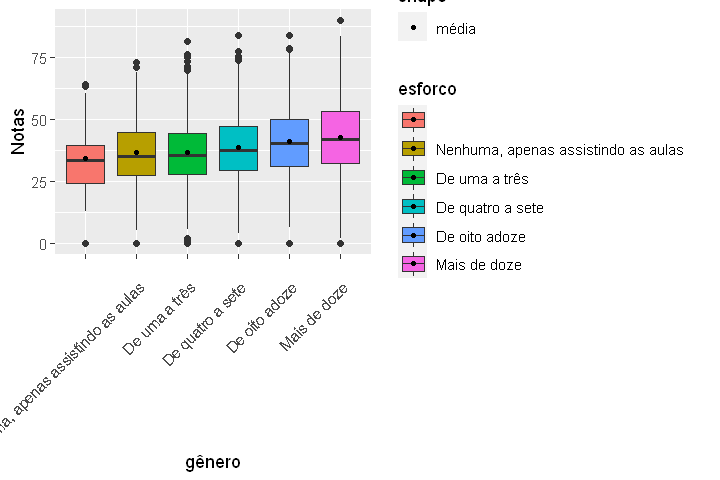

In [17]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x=esforco, y=notas, fill=esforco)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    xlab("gênero")+
    ylab("Notas")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

# Faixa de Renda
---
* Quanto maior a renda maior o desempenho

In [18]:
renda = df$QE_I08
renda = mapvalues(df$QE_I08, from=c("A","B","C","D","E","F","G"), to=c("Até 1.5 salário mínimo","De 1.5 a 3 salários mínimos",
                                                                "De 3 a 4.5 salários mínimos","De 4.5 a 6 salários mínimos","De 6 a 10 salários mínimos",
                                                                                "10 a 30 salários mínimos", "Acima de 30 salários mínimos"))
prop.table(table(renda))

renda
                                   Até 1.5 salário mínimo 
                  0.11344187                   0.13420998 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                  0.16301398                   0.15737842 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                  0.10363181                   0.13963682 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                  0.13661031                   0.05207681 

In [19]:
tapply(notas, renda, FUN=mean, na.rm=T)

Até 1.5 salário mínimo 
                    34.51633                     34.41064 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                    35.29743                     36.29457 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                    38.04718                     40.28169 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                    44.10796                     45.88846

Warning message:
"Removed 1509 rows containing non-finite values (stat_summary)."

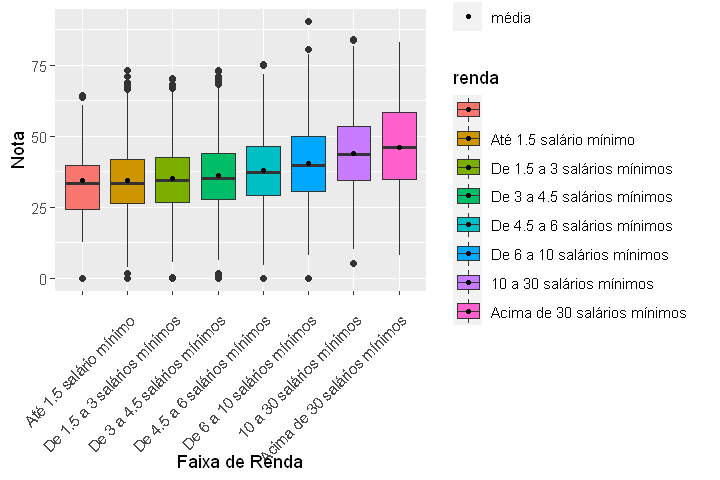

In [20]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x=renda, y=notas, fill=renda)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    xlab("Faixa de Renda")+
    ylab("Nota")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

# Escolaridade dos Pais
---
* Proxis de nível social
* Alunos com pais que concluiram o ensino superior possuem média de notas maiores


In [21]:
escolaridade = as.factor(df$QE_I21)
escolaridade = mapvalues(df$QE_I21, from=c("A","B"), to=c("sim","não"))
prop.table(table(escolaridade))

escolaridade
                sim       não 
0.1134419 0.6793989 0.2071593 

In [22]:
tapply(notas, escolaridade, FUN=mean, na.rm=T)

sim      não 
34.51633 39.35790 35.40174

Warning message:
"Removed 1509 rows containing non-finite values (stat_summary)."

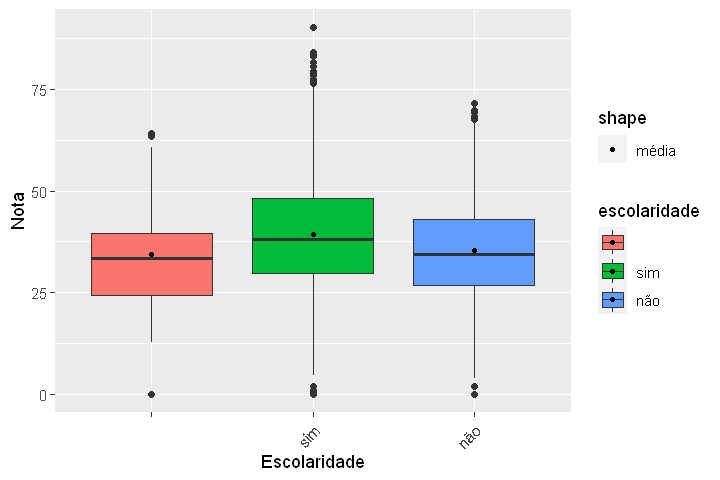

In [23]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x=escolaridade, y=notas, fill=escolaridade)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    xlab("Escolaridade")+
    ylab("Nota")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

# Idade
---

In [24]:
idade = df$NU_IDADE

# Trabalho
---
* Quem não trabalho possui média de notas maiores
* Existe suspeitas que as horas de trabalho influenciam o desempenho, mas não certeza estatística

In [25]:
trabalho = as.factor(df$QE_I10)
trabalho = mapvalues(df$QE_I10, from=c("A","B","C","D","E"), to=c("Não trabalha",
                                                                  "Trabalha eventualmente",
                                                                 "Trabalha até 20 hrs. semanais",
                                                                 "Trabalha de 21 a 39 hrs. semanais",
                                                                 "Trabalha 40 hrs. semanais ou mais"))
prop.table(table(trabalho))

trabalho
                                                       Não trabalha 
                       0.11344187                        0.35170111 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                       0.03934460                        0.03871843 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                       0.12888750                        0.32790649 

In [26]:
tapply(notas, trabalho, FUN=mean, na.rm=T)

Não trabalha 
                         34.51633                          40.34725 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                         38.99009                          38.58397 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                         38.46692                          36.22492

Warning message:
"Removed 1509 rows containing non-finite values (stat_summary)."

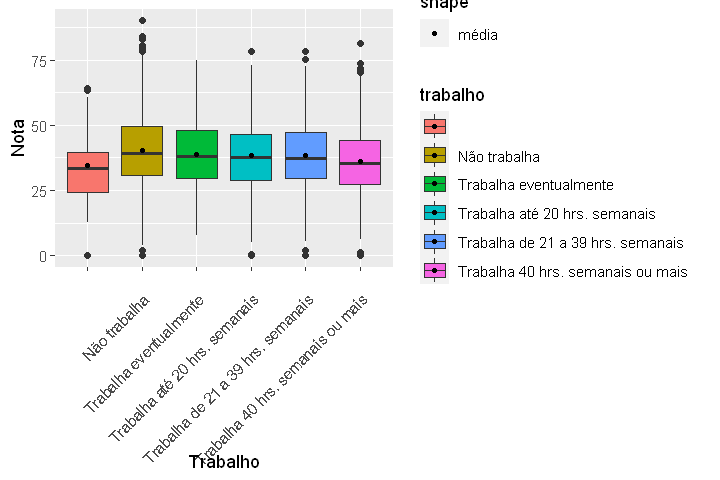

In [27]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x=trabalho, y=notas, fill=trabalho)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    xlab("Trabalho")+
    ylab("Nota")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

# Data Frame

In [28]:
df_1 = data.frame(notas=notas, modalidade=modalidade, esforco=esforco, idade=idade, renda=renda, trabalho=trabalho,
         escolaridade=escolaridade)

In [29]:
head(df_1)

notas,modalidade,esforco,idade,renda,trabalho,escolaridade
24.9,presencial,De quatro a sete,28,De 3 a 4.5 salários mínimos,Trabalha 40 hrs. semanais ou mais,não
25.6,presencial,De uma a três,30,De 4.5 a 6 salários mínimos,Trabalha 40 hrs. semanais ou mais,sim
48.7,presencial,De quatro a sete,29,De 3 a 4.5 salários mínimos,Trabalha 40 hrs. semanais ou mais,não
35.7,presencial,De uma a três,22,De 1.5 a 3 salários mínimos,Trabalha 40 hrs. semanais ou mais,sim
33.9,presencial,De quatro a sete,47,De 1.5 a 3 salários mínimos,Trabalha 40 hrs. semanais ou mais,sim
23.5,presencial,De quatro a sete,27,De 3 a 4.5 salários mínimos,Trabalha 40 hrs. semanais ou mais,não


In [37]:
table(modalidade)

modalidade
 distancia presencial 
       151       9431 

# Teste Anova
---
* Como temoas apenas variáveis categóricas, vamos gerar uma regressão Anova
* A Anova mostra que as diferenças entre as categorias são estatisticamente significantes
* A modalidade é estatisticamente insignificante


In [30]:
anova = aov(notas ~ esforco+modalidade+idade+renda+trabalho+escolaridade)
summary(anova)

               Df  Sum Sq Mean Sq F value   Pr(>F)    
esforco         5   35617    7123  47.601  < 2e-16 ***
modalidade      1      41      41   0.274    0.601    
idade           1   31118   31118 207.948  < 2e-16 ***
renda           6   95007   15834 105.813  < 2e-16 ***
trabalho        4   23369    5842  39.041  < 2e-16 ***
escolaridade    1    2838    2838  18.962 1.35e-05 ***
Residuals    8054 1205243     150                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
1509 observations deleted due to missingness

# Regressão Lineaqr Múltipla
---
* Inferências 
* Trabalho: quem não trabalha tem 13 pontos a cima de quem não respondeu nada.
    * Todas as dummys são significantes, e decrescentes, a medida que aumenta o numero de trabalho semanal, menor a produtividade do ensino.
* Idade: Quando maior a idade, menor a nota esperada: 0.26 pontos a menos a cada ano a mais de idade.
* Escolariadde da família: pais com curso superior tem esperado 1.47 a mais na nota.
* Faixa de renda: maior renda possui 10 pontos esperados a mais que os alunos de menor renda
> As variáveis independentes explicam 13.45% a variância da variavel dependente.


In [40]:
mod = lm(notas~trabalho+idade+escolaridade+renda+esforco, data=df_1)
summary(mod)


Call:
lm(formula = notas ~ trabalho + idade + escolaridade + renda + 
    esforco, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.742  -8.530  -0.662   8.141  43.370 

Coefficients: (3 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                                 41.69629    1.89557  21.997
trabalhoNão trabalha                        13.57677    1.91381   7.094
trabalhoTrabalha eventualmente              12.92888    2.01713   6.410
trabalhoTrabalha até 20 hrs. semanais       11.70894    2.00929   5.827
trabalhoTrabalha de 21 a 39 hrs. semanais   10.85083    1.93272   5.614
trabalhoTrabalha 40 hrs. semanais ou mais    9.64179    1.91346   5.039
idade                                       -0.25869    0.02643  -9.787
escolaridadesim                              1.46994    0.33883   4.338
escolaridadenão                                   NA         NA      NA
rendaAté 1.5 salário mínimo      

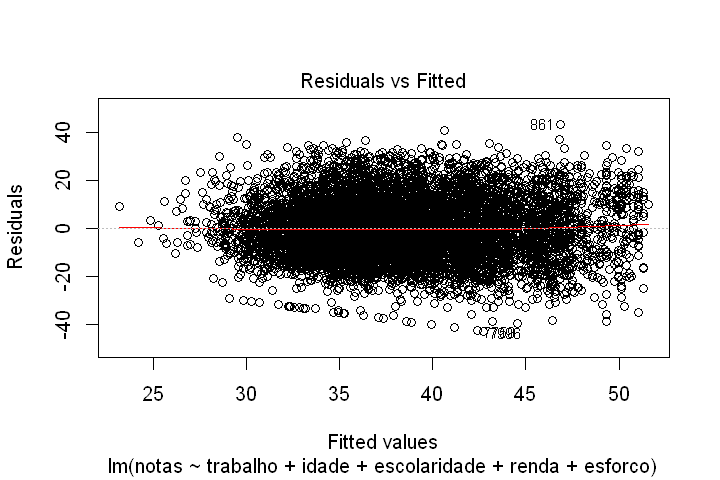

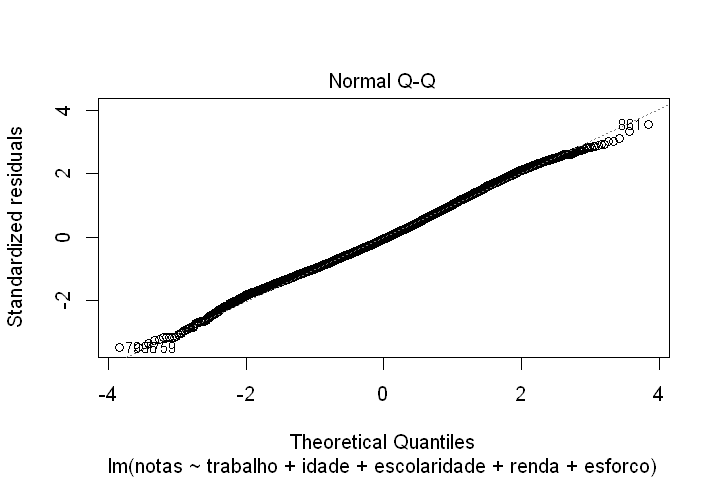

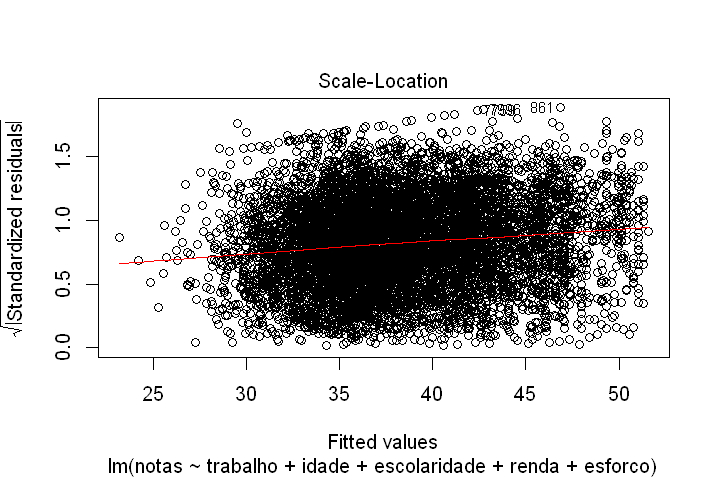

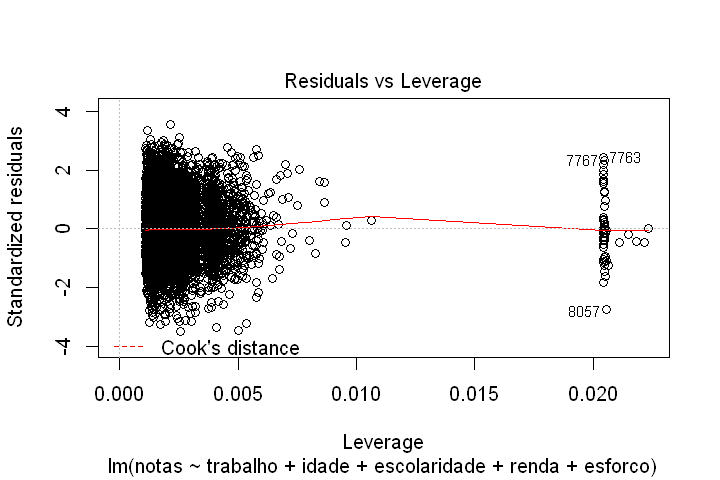

In [41]:
plot(mod)

# Independência dos resíduos: Durbin-Watson
---
* Não pode rejeitar a hipótese nula

In [42]:
dwtest(mod)


	Durbin-Watson test

data:  mod
DW = 1.7613, p-value = 0.7813
alternative hypothesis: true autocorrelation is greater than 0


# Teste Breusch–Pagan: Homocedasticidade
---
* Rejeição da heterocedasticidade

In [43]:
bptest(mod)


	studentized Breusch-Pagan test

data:  mod
BP = 126.46, df = 17, p-value < 2.2e-16


# Teste de normalidade dos resíduos
---
* Os erros são normais e é válido a regressão

In [47]:
ad.test(mod$residuals)


	Anderson-Darling normality test

data:  mod$residuals
A = 9.3722, p-value < 2.2e-16
